# Car DataSet

## Global Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)


## Explore Data shape

In [137]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [138]:
# Checking dataframe shape
np.shape(df)

(11914, 16)

In [139]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# Fixing Column Names

In [140]:
# All columns have name without underscore except Driven_Wheels column, so we can remove that underscore so that all columns are written similarly
df = df.rename(columns={'Driven_Wheels':'Driven Wheels'})
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Handling Duplicated Values

In [141]:
#we will check for duplicated values
duplicatedBool = df.duplicated(keep=False)
duplicatedRows = df[duplicatedBool]
duplicatedRows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
17,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,Volvo,XC60,2017,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Midsize,4dr SUV,30,23,870,40950
11707,Suzuki,XL7,2008,regular unleaded,252.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,22,15,481,29149
11708,Suzuki,XL7,2008,regular unleaded,252.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,22,15,481,29149
11709,Suzuki,XL7,2008,regular unleaded,252.0,6.0,AUTOMATIC,front wheel drive,4.0,Crossover,Midsize,4dr SUV,22,16,481,27499


In [ ]:
#we will drop duplicated values
df = df.drop_duplicates()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine Fuel Type   11196 non-null  object 
 4   Engine HP          11130 non-null  float64
 5   Engine Cylinders   11169 non-null  float64
 6   Transmission Type  11199 non-null  object 
 7   Driven Wheels      11199 non-null  object 
 8   Number of Doors    11193 non-null  float64
 9   Market Category    7823 non-null   object 
 10  Vehicle Size       11199 non-null  object 
 11  Vehicle Style      11199 non-null  object 
 12  highway MPG        11199 non-null  int64  
 13  city mpg           11199 non-null  int64  
 14  Popularity         11199 non-null  int64  
 15  MSRP               11199 non-null  int64  
dtypes: float64(3), int64(5), ob

In [143]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


# Handling Missing Values

In [144]:
# Checking which columns have null values
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven Wheels,0
Number of Doors,6
Market Category,3376


## 1) Handle Missing In Engine Fuel

In [145]:
df[df['Engine Fuel Type'].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499


In [146]:
#all are Make Suzuki and Model Verona

In [147]:
df[(df['Make']=='Suzuki') & (df['Model']=='Verona')]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499
11324,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,19349
11325,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,21049
11326,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,17549
11327,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,20549
11328,Suzuki,Verona,2006,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20299
11329,Suzuki,Verona,2006,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18299


In [148]:
#all Suzuki and Verona are regular unleaded so we can fill the null values with that as well
df['Engine Fuel Type']=df['Engine Fuel Type'].fillna('regular unleaded')
df[df['Engine Fuel Type'].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


## 2) Handle Missing in Number of Doors

In [149]:
df[df['Number of Doors'].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4666,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000
6930,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,105,102,1391,79500
6931,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,101,98,1391,66000
6932,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,High-Performance",Large,Sedan,105,92,1391,134500
6933,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,rear wheel drive,NaN,"Exotic,Performance",Large,Sedan,100,97,1391,74500
6934,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,107,101,1391,71000


In [150]:
# Most of them are Make Tesla and Model S
df[(df['Make']=='Tesla')&(df['Model']=='Model S')]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
6921,Tesla,Model S,2014,electric,NaN,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,90,88,1391,79900
6922,Tesla,Model S,2014,electric,NaN,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,Performance",Large,Sedan,97,94,1391,69900
6923,Tesla,Model S,2014,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,94,86,1391,104500
6924,Tesla,Model S,2014,electric,NaN,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,90,88,1391,93400
6925,Tesla,Model S,2015,electric,NaN,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,Performance",Large,Sedan,97,94,1391,69900
6926,Tesla,Model S,2015,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,Performance",Large,Sedan,102,101,1391,75000
6927,Tesla,Model S,2015,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,106,95,1391,85000
6928,Tesla,Model S,2015,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,98,89,1391,105000
6929,Tesla,Model S,2015,electric,NaN,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,Performance",Large,Sedan,90,88,1391,80000
6930,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,105,102,1391,79500


In [151]:
# all Tesla and Model S have number of doors = 4 so replace null values by 4
df['Number of Doors']=df['Number of Doors'].fillna(4.0)
df[df['Number of Doors'].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


## 3) Handlying Nulls in Engine Hp & Engine Cylinders

In [152]:
# Engine HP and Engine Cylinders are discrete values so we will replace null values by the median
Engine_HP_median=df['Engine HP'].median()
df['Engine HP']=df['Engine HP'].fillna(Engine_HP_median)
Engine_Cylinders_median=df['Engine Cylinders'].median()
df['Engine Cylinders']=df['Engine Cylinders'].fillna(Engine_Cylinders_median)
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven Wheels,0
Number of Doors,0
Market Category,3376


## 4) Handlying Nulls in Market Category

In [153]:
unique_categories = set()
df.loc[:,'Market Category'] = df['Market Category'].fillna(df['Market Category'].mode()[0])
market_category_values = df['Market Category'].values
market_category_values

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', ..., 'Crossover,Hatchback,Luxury',
       'Crossover,Hatchback,Luxury', 'Luxury'], dtype=object)

In [154]:
for s in market_category_values:
    unique_categories.update(s.split(','))
unique_categories

{'Crossover',
 'Diesel',
 'Exotic',
 'Factory Tuner',
 'Flex Fuel',
 'Hatchback',
 'High-Performance',
 'Hybrid',
 'Luxury',
 'Performance'}

In [155]:
for x in unique_categories:
    df.loc[:, x] = df['Market Category'].str.contains(x).astype(int)
df['Performance'] = df['High-Performance'].astype(bool) | df['Performance'].astype(bool)
df['Performance'] = df['Performance'].astype(int)
df.drop('High-Performance',axis='columns',inplace=True)

In [156]:
df.drop('Market Category',axis='columns',inplace=True)

In [157]:
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven Wheels,0
Number of Doors,0
Vehicle Size,0


### we no longer have null values in any column

# Handling Incorrect Datatypes

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11199 entries, 0 to 11913
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine Fuel Type   11199 non-null  object 
 4   Engine HP          11199 non-null  float64
 5   Engine Cylinders   11199 non-null  float64
 6   Transmission Type  11199 non-null  object 
 7   Driven Wheels      11199 non-null  object 
 8   Number of Doors    11199 non-null  float64
 9   Vehicle Size       11199 non-null  object 
 10  Vehicle Style      11199 non-null  object 
 11  highway MPG        11199 non-null  int64  
 12  city mpg           11199 non-null  int64  
 13  Popularity         11199 non-null  int64  
 14  MSRP               11199 non-null  int64  
 15  Crossover          11199 non-null  int64  
 16  Performance        11199 no

In [159]:
df['Engine Cylinders'] = df['Engine Cylinders'].astype(int)
df['Number of Doors'] = df['Number of Doors'].astype(int)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11199 entries, 0 to 11913
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine Fuel Type   11199 non-null  object 
 4   Engine HP          11199 non-null  float64
 5   Engine Cylinders   11199 non-null  int64  
 6   Transmission Type  11199 non-null  object 
 7   Driven Wheels      11199 non-null  object 
 8   Number of Doors    11199 non-null  int64  
 9   Vehicle Size       11199 non-null  object 
 10  Vehicle Style      11199 non-null  object 
 11  highway MPG        11199 non-null  int64  
 12  city mpg           11199 non-null  int64  
 13  Popularity         11199 non-null  int64  
 14  MSRP               11199 non-null  int64  
 15  Crossover          11199 non-null  int64  
 16  Performance        11199 no

# Feature Engineering

#### We can create a new feature for average fuel efficiency by taking the mean of the highway and city mpg values.

In [161]:
df['fuel efficiency']=(df['highway MPG'] + df['city mpg'])/2
df.drop(['highway MPG','city mpg'],axis='columns',inplace=True)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Number of Doors,Vehicle Size,Vehicle Style,Popularity,MSRP,Crossover,Performance,Luxury,Exotic,Hatchback,Flex Fuel,Diesel,Hybrid,Factory Tuner,fuel efficiency
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6,MANUAL,rear wheel drive,2,Compact,Coupe,3916,46135,0,1,1,0,0,0,0,0,1,22.5
1,BMW,1 Series,2011,premium unleaded (required),300.0,6,MANUAL,rear wheel drive,2,Compact,Convertible,3916,40650,0,1,1,0,0,0,0,0,0,23.5
2,BMW,1 Series,2011,premium unleaded (required),300.0,6,MANUAL,rear wheel drive,2,Compact,Coupe,3916,36350,0,1,1,0,0,0,0,0,0,24.0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6,MANUAL,rear wheel drive,2,Compact,Coupe,3916,29450,0,1,1,0,0,0,0,0,0,23.0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6,MANUAL,rear wheel drive,2,Compact,Convertible,3916,34500,0,0,1,0,0,0,0,0,0,23.0


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11199 entries, 0 to 11913
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine Fuel Type   11199 non-null  object 
 4   Engine HP          11199 non-null  float64
 5   Engine Cylinders   11199 non-null  int64  
 6   Transmission Type  11199 non-null  object 
 7   Driven Wheels      11199 non-null  object 
 8   Number of Doors    11199 non-null  int64  
 9   Vehicle Size       11199 non-null  object 
 10  Vehicle Style      11199 non-null  object 
 11  Popularity         11199 non-null  int64  
 12  MSRP               11199 non-null  int64  
 13  Crossover          11199 non-null  int64  
 14  Performance        11199 non-null  int64  
 15  Luxury             11199 non-null  int64  
 16  Exotic             11199 no

## Viusalizations

### Heatmap

In [163]:
# we will draw correlation for numeric features only
df_numeric = df.select_dtypes(exclude=['object'])
df_numeric.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,Popularity,MSRP,Crossover,Performance,Luxury,Exotic,Hatchback,Flex Fuel,Diesel,Hybrid,Factory Tuner,fuel efficiency
0,2011,335.0,6,2,3916,46135,0,1,1,0,0,0,0,0,1,22.5
1,2011,300.0,6,2,3916,40650,0,1,1,0,0,0,0,0,0,23.5
2,2011,300.0,6,2,3916,36350,0,1,1,0,0,0,0,0,0,24.0
3,2011,230.0,6,2,3916,29450,0,1,1,0,0,0,0,0,0,23.0
4,2011,230.0,6,2,3916,34500,0,0,1,0,0,0,0,0,0,23.0


Text(0.5, 1.0, 'Correlation Heatmap')

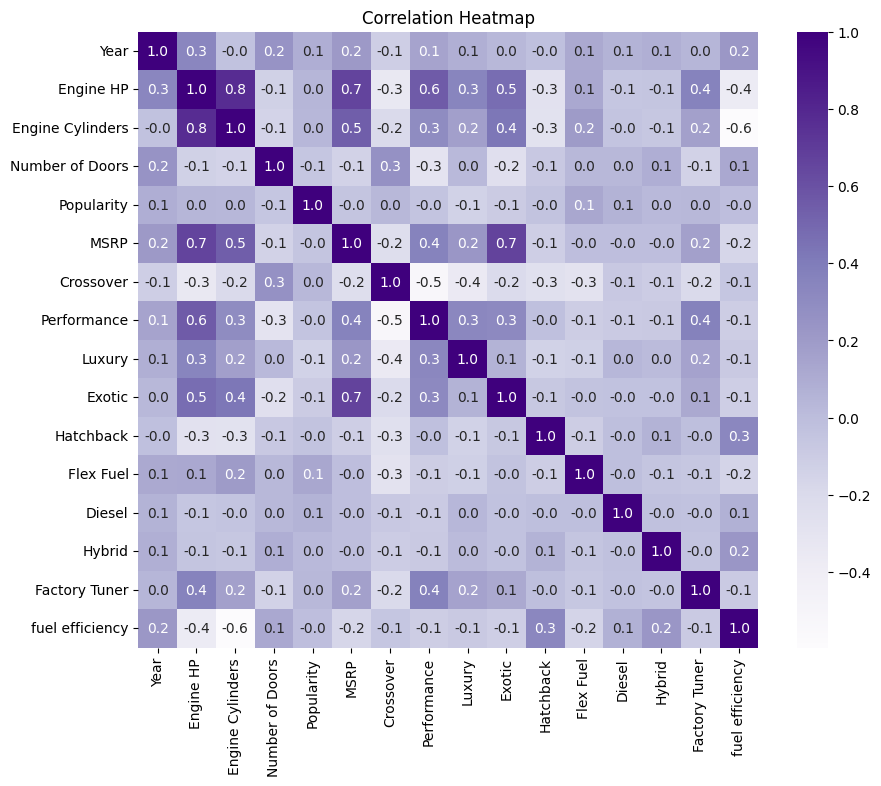

In [164]:
plt.figure(figsize=(10, 8)) #adjusting figure size
correlation=df_numeric.corr()
sns.heatmap(correlation, annot=True, cmap='Purples',fmt=".1f") #.1f means 1 decimal place only
plt.title("Correlation Heatmap")

#### we will drop the numeric features of correlation of 0.0-0.1 Bec they represent weak correlation

In [165]:

df.drop(['Diesel','Flex Fuel','Hybrid','Number of Doors','Hatchback'],axis='columns',inplace=True)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Vehicle Size,Vehicle Style,Popularity,MSRP,Crossover,Performance,Luxury,Exotic,Factory Tuner,fuel efficiency
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6,MANUAL,rear wheel drive,Compact,Coupe,3916,46135,0,1,1,0,1,22.5
1,BMW,1 Series,2011,premium unleaded (required),300.0,6,MANUAL,rear wheel drive,Compact,Convertible,3916,40650,0,1,1,0,0,23.5
2,BMW,1 Series,2011,premium unleaded (required),300.0,6,MANUAL,rear wheel drive,Compact,Coupe,3916,36350,0,1,1,0,0,24.0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6,MANUAL,rear wheel drive,Compact,Coupe,3916,29450,0,1,1,0,0,23.0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6,MANUAL,rear wheel drive,Compact,Convertible,3916,34500,0,0,1,0,0,23.0


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11199 entries, 0 to 11913
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine Fuel Type   11199 non-null  object 
 4   Engine HP          11199 non-null  float64
 5   Engine Cylinders   11199 non-null  int64  
 6   Transmission Type  11199 non-null  object 
 7   Driven Wheels      11199 non-null  object 
 8   Vehicle Size       11199 non-null  object 
 9   Vehicle Style      11199 non-null  object 
 10  Popularity         11199 non-null  int64  
 11  MSRP               11199 non-null  int64  
 12  Crossover          11199 non-null  int64  
 13  Performance        11199 non-null  int64  
 14  Luxury             11199 non-null  int64  
 15  Exotic             11199 non-null  int64  
 16  Factory Tuner      11199 no

# Correlation after dropping the unnecessary columns

Text(0.5, 1.0, 'Correlation Heatmap')

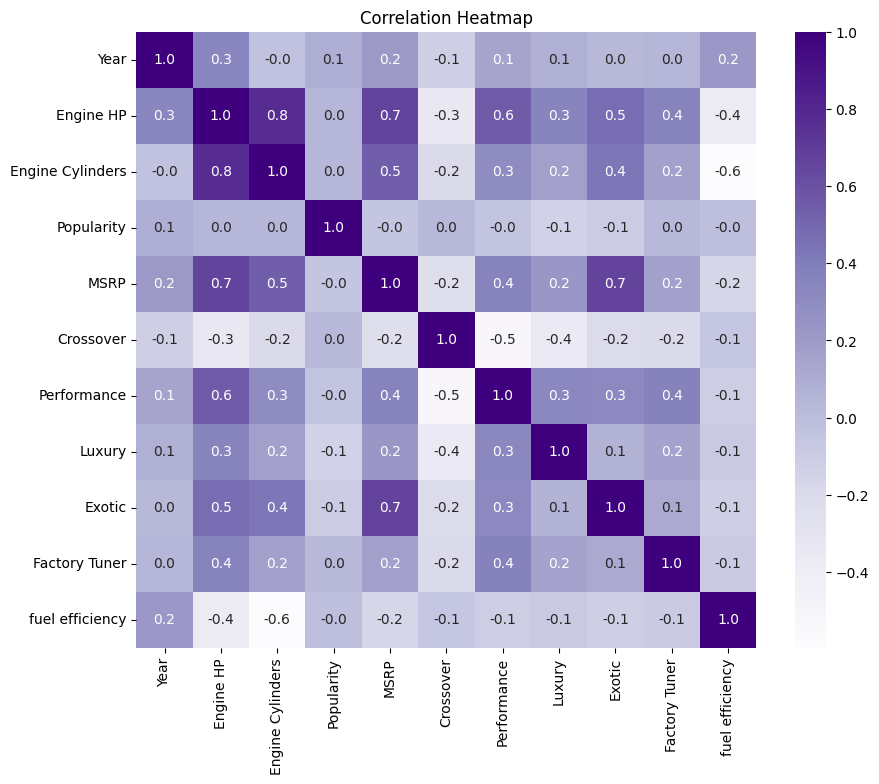

In [167]:
#we will draw the correlation after we dropped the unnecessary columns
df_numeric2 = df.select_dtypes(exclude=['object'])
plt.figure(figsize=(10, 8)) #adjusting figure size
correlation=df_numeric2.corr()
sns.heatmap(correlation, annot=True, cmap='Purples',fmt=".1f") #.1f means 1 decimal place only
plt.title("Correlation Heatmap")

### Histogram

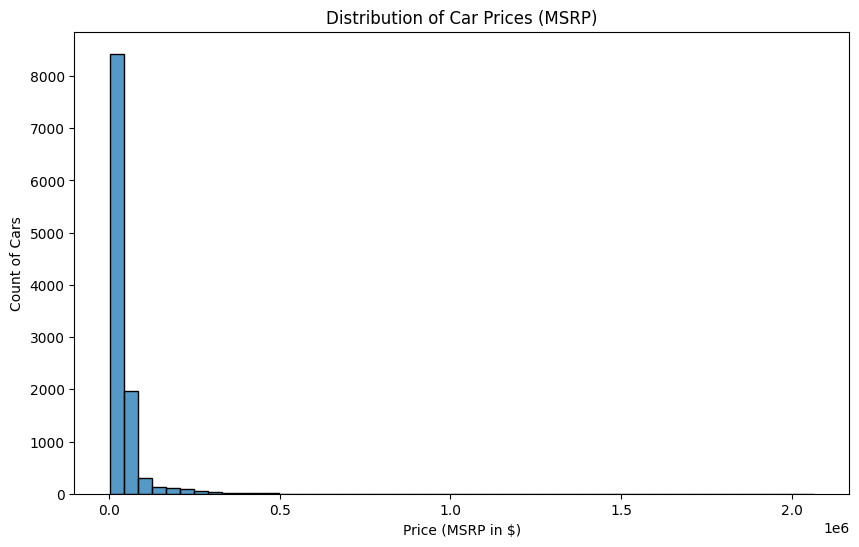

In [168]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MSRP', bins=50)
plt.title('Distribution of Car Prices (MSRP)')
plt.xlabel('Price (MSRP in $)')
plt.ylabel('Count of Cars')
plt.show()

## Save cleaned data into a data frame

In [169]:
df.to_excel('cleaned_car_data.xlsx', index=False)